<a href="https://colab.research.google.com/github/tatadocomo/COMP4971/blob/main/COMP4971_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('Test.csv')

series = TimeSeries.from_dataframe(df, 'Date', 'Price')
series.plot(label = "Date against HSI closing price")
plt.legend();

train_series, value_series = series[:-7], series[-7:]

model_series = NBEATSModel(input_chunk_length=5, output_chunk_length = 2, n_epochs = 200, random_state = 0)
model_series.fit(train_series, verbose = True)

pred = model_series.predict(n = 7)

series.plot(label = "actual")
pred.plot(label = "forecast")
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series, pred)))

# train, val = series.split_before(pd.Timestamp('20070115'))

# model = ExponentialSmoothing()
# model.fit(train)
# prediction = model.predict(len(val))

# series.plot(label='actual')
# prediction.plot(label='forecast', lw=3)
# plt.legend()

In [ ]:
!pip install darts

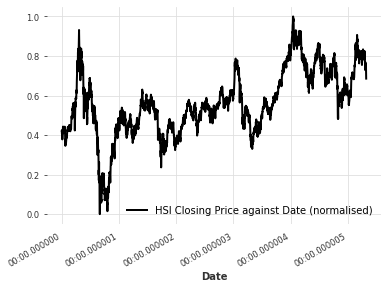

In [43]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

test = pd.read_csv('test.csv')
test.interpolate(method = 'linear', direction = 'forward', inplace = True)
test.to_csv('data.csv', index=False)
# print(test.head())

datastuff = pd.read_csv('data.csv')
series = TimeSeries.from_dataframe(datastuff, 'Date', 'HSI Closing Price')
# series.plot(label = "HSI Closing Price against Date ")
# plt.legend();

scaled_test = Scaler()
series_test_scaled = scaled_test.fit_transform(series)
series_test_scaled.plot(label = "HSI Closing Price against Date (normalised)")
plt.legend();